# <font color=#025dfa> Elmas Fiyat Analizi - Diamond Price Analysis

Bu çalışmamızda makine öğrenmesi ile gelecek yıllanır sıcaklığını tahmin eden bir model oluşturacağız.

TR = Her yorum satırı kendisini üstündeki koda aittir. İlk olarak Türkçe, son olarak İngilizce yazıldı.
EN = Each comment line belongs to the code above it. It was first written in Turkish and lastly in English.

Kaynak/Source =  https://thecleverprogrammer.com/2022/09/26/diamond-price-analysis-using-python/

In [56]:
#pip install pycaret

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.preprocessing import normalize, scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from pycaret.regression import*

In [58]:
pd.set_option("display.max_columns",None)
# TR = En fazla kaç sütun olduğunu gösteriyor.
# EN = It shows the maximum number of columns.

In [59]:
df=pd.read_csv('diamonds.csv')

## <font color=#FFD700> EDA Keşif Amaçlı Veri Analizi - EDA - Exploratory Data Analysis

In [60]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [61]:
df.sample(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
45556,45557,0.54,Premium,E,VS2,59.0,60.0,1687,5.38,5.32,3.15
23149,23150,1.08,Ideal,E,VVS2,61.0,56.0,11166,6.64,6.67,4.06
49355,49356,0.71,Very Good,F,SI2,63.6,56.0,2098,5.58,5.67,3.58
53142,53143,0.78,Ideal,F,SI2,61.2,56.0,2622,5.93,5.97,3.64
5625,5626,1.00,Premium,J,VS2,60.7,58.0,3877,6.49,6.52,3.95


In [62]:
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [63]:
df.shape

(53940, 11)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [65]:
df.isnull().sum().sort_values(ascending=True)

,0
Unnamed: 0,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0


In [66]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [67]:
df.corr(numeric_only=True)

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


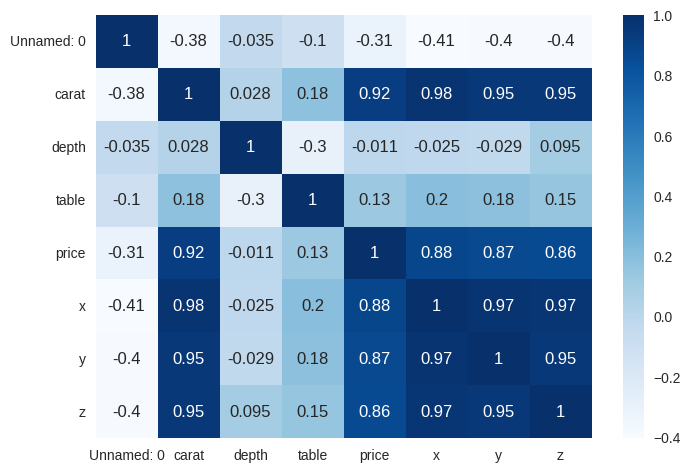

In [68]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Blues');

In [69]:
setup(df,target='price')

,Description,Value
0,Session id,3171
1,Target,price
2,Target type,Regression
3,Original data shape,"(53940, 11)"
4,Transformed data shape,"(53940, 28)"
5,Transformed train set shape,"(37758, 28)"
6,Transformed test set shape,"(16182, 28)"
7,Numeric features,7
8,Categorical features,3
9,Preprocess,True


In [70]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,3.1124,1517.9737,36.7127,0.9999,0.0405,0.0035,0.6890
rf,Random Forest Regressor,3.6526,1204.8671,33.4280,0.9999,0.0321,0.0046,24.6540
et,Extra Trees Regressor,6.1356,2316.0926,43.9566,0.9999,0.0283,0.0049,20.6820
xgboost,Extreme Gradient Boosting,27.3124,4023.3645,59.1024,0.9998,0.0403,0.0155,1.0180
lightgbm,Light Gradient Boosting Machine,31.6274,8490.8608,80.1720,0.9995,0.0463,0.0196,3.6210
gbr,Gradient Boosting Regressor,133.6427,47342.8890,217.0167,0.9970,0.1054,0.0706,6.5640
knn,K Neighbors Regressor,44.4207,114977.6818,335.4136,0.9928,0.1511,0.0408,1.0480
ada,AdaBoost Regressor,344.1393,207459.6126,454.0418,0.9870,0.2309,0.1835,3.8290
llar,Lasso Least Angle Regression,743.5929,1280736.4126,1130.8460,0.9197,0.5865,0.3970,0.4690
lasso,Lasso Regression,743.5973,1280737.1274,1130.8464,0.9197,0.5865,0.3970,0.6510


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

## <font color='#0F52BA'> Öznitelik Mühendisliği - Feature Engineering

### <font color=#007fff> Model - Modelling

In [71]:
x=df.drop('price',axis=1)
y=df[['price']]

In [72]:
x=pd.get_dummies(x,drop_first=True)
# Tr =  kategorik değişkenlerin sayısal değişkenlere dönüştürülmesi için kullanılır.
# En = It is used to convert categorical variables into numerical variables.

In [73]:
x=scale(x)

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
# TR = modelimizi eğittik.
# EN = We trained our model.

In [75]:
x = np.random.random((100, 64, 64, 3))  # 100 örnek, her biri 64x64, 3 kanal
y = np.random.randint(0, 2, size=(100, 1))  # İkili sınıflandırma etiketleri
x_test = np.random.random((24, 64, 64, 3))  # Örnek test verisi
y_test = np.random.randint(0, 2, size=(24, 1))  # Örnek etiketler
model = Sequential([

    # Örnek konvolüsyon katmanları
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    # TR = Bu katman, giriş verisinin belirli bir bölgesindeki (pool size) maksimum değeri seçerek, özellik haritalarının boyutlarını küçültür.
    # Havuzlama penceresinin boyutunu belirtir. 2x2 boyutunda bir pencere kullanılır.

    # EN = This layer reduces the size of the feature maps by selecting the maximum value in a specific region (pool size) of the input data.
    # It specifies the size of the pooling window. A 2x2 window is used.

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    # TR = Derin öğrenme modelindeki çok boyutlu (2D, 3D vb.) verileri tek boyutlu bir vektöre dönüştürür.
    # EN = It converts multidimensional (2D, 3D, etc.) data in the deep learning model into a one-dimensional vector.

    Dense(240, activation='relu'),
    # TR = Bu katman, tüm giriş nöronlarına bağlantı kurar ve her nöronun ağırlıklarını öğrenir. 240 nöron var.
    # Aktivasyon fonksiyonunu ReLU (Rectified Linear Unit) olarak ayarlar. ReLU fonksiyonu, negatif değerleri sıfıra dönüştürür ve pozitif değerleri olduğu gibi bırakır.

    # EN = This layer connects all input neurons and learns the weights of each neuron. There are 240 neurons.
    # Sets the activation function to ReLU (Rectified Linear Unit). The ReLU function converts negative values ​​to zero and leaves positive values ​​as is.

    BatchNormalization(),
    # TR = Bu katman, modelin eğitim sürecini daha stabil hale getirmek için kullanılır.
    # EN = This layer is used to make the training process of the model more stable.


    Dense(120, activation='relu'),
    BatchNormalization(),

    Dense(64, activation='relu'),
    BatchNormalization(),

    Dense(24, activation='relu'),
    BatchNormalization(),

    Dense(12, activation='relu'),
    BatchNormalization(),

    Dense(2, activation='relu'),
    Dropout(0.5),
    # TR = Derin öğrenme modelinde aşırı uyumu (overfitting) azaltmak için kullanılır.
    # EN = It is used to reduce overfitting in the deep learning model.

    Dense(1,activation='sigmoid')
    # TR = Sigmoid aktivasyon fonksiyonu, her bir nöronun çıkışını 0 ile 1 arasında bir değere dönüştürür.
    # Bu, özellikle ikili sınıflandırma problemlerinde her iki sınıfa ait olasılıkları tahmin etmek için uygundur.
    # EN = The sigmoid activation function transforms the output of each neuron into a value between 0 and 1.
    # This is particularly suitable for estimating probabilities of belonging to both classes in binary classification problems.

    # TR = activation='sigmoid' iki sınıftan birine ait olup olmadığını tahmin etmek için kullanılır. Örneğin, bir e-postanın spam olup olmadığını sınıflandırmak.
    # EN = activation='sigmoid' is used to predict whether an email belongs to one of two classes. For example, to classify whether an email is spam or not.
])

model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mae'])
# TR = Mean Squared Error (MSE): Bu kayıp fonksiyonu, regresyon problemlerinde kullanılır. Modelin tahminleri ile gerçek değerler arasındaki farkların karelerinin ortalamasını hesaplar.
# EN = Mean Squared Error (MSE): This loss function is used in regression problems. It calculates the average of the squared differences between the model's predictions and the true values.

# TR = optimizer='adam': Adam (Adaptive Moment Estimation) optimizasyon algoritması, modelin ağırlıklarını güncellerken kullanılan bir yöntemdir.
# EN = optimizer='adam': Adam (Adaptive Moment Estimation) optimization algorithm is a method used when updating the weights of the model.

# TR = (MAE): Ortalama Mutlak Hata, modelin tahminleri ile gerçek değerler arasındaki farkların mutlak değerlerinin ortalamasını hesaplar.
# EN = (MAE): (MAE): Mean Absolute Error calculates the average of the absolute values ​​of the differences between the model's predictions and the true values.

In [76]:
history=model.fit(x,y,epochs=17,batch_size=32, validation_split=.20,verbose=1)
#epochs=Eğitim verilerinin tamamının modele aktarıldığı ve ardından modelin güncellenmesi işleminin bir kez gerçekleştirildiği bir döngü olarak tanımlanabilir.
#batch_size=Bir şeferde kaç tane satır alacağını ve hesaplayacağını şöylüyor
#validation_split=train_test_split gibi
#verbose=Modelin eğitimi sırasında konsola (veya diğer çıktı cihazlarına) yazdırılan bilgi miktarını kontrol eder.

Epoch 1/17
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 349ms/step - loss: 0.2258 - mae: 0.4484 - val_loss: 0.2515 - val_mae: 0.5003
Epoch 2/17
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step - loss: 0.2212 - mae: 0.4345 - val_loss: 0.2512 - val_mae: 0.5002
Epoch 3/17
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - loss: 0.2375 - mae: 0.4607 - val_loss: 0.2523 - val_mae: 0.4999
Epoch 4/17
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step - loss: 0.2471 - mae: 0.4628 - val_loss: 0.2537 - val_mae: 0.5000
Epoch 5/17
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - loss: 0.2455 - mae: 0.4701 - val_loss: 0.2521 - val_mae: 0.5003
Epoch 6/17
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - loss: 0.2112 - mae: 0.4254 - val_loss: 0.2515 - val_mae: 0.5007
Epoch 7/17
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - loss: 0.2161 - mae: 0.4322 - val_loss: 0.2504 - val_mae: 0.5001
Epoch 8/17
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 267ms/step - loss: 0.2232 - mae: 0.4418 - val_loss: 0.2503 - val_mae: 0.5002
Epoch 9/17
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 298ms/step - loss: 0.2082 - mae: 

In [77]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 240)                 │       1,106,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 240)                 │             960 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 120)                 │          28,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 120)                 │             480 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           7,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 24)                  │           1,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 24)                  │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 12)                  │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 12)                  │              48 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 2)                   │              26 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2)                   │              

 Total params: 3,717,565 (14.18 MB)

 Trainable params: 1,238,881 (4.73 MB)

 Non-trainable params: 920 (3.59 KB)

 Optimizer params: 2,477,764 (9.45 MB)

In [78]:
test_loss, test_acc = model.evaluate(x_test, y_test)
# TR = test_loss değişkeni, test verileri üzerinde hesaplanan kayıp değerini içerir. test_acc değişkeni, test verileri üzerinde hesaplanan doğruluk değerini içerir.
# EN = The test_loss variable contains the loss value calculated on the test data. The test_acc variable contains the accuracy value calculated on the test data.

print(f"Test doğruluğu: {test_acc:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.2506 - mae: 0.5005
Test doğruluğu: 0.5005


In [79]:
pred=model.predict(x_test)
# TR = modeli x_test ile predict özelliği ile tahmin ettik. predict=tahmin demek. Dahmin edip pred eşitledik.
# EN = We predicted the model with x_test and the predict feature. predict=means prediction. We guessed and equalized the pred.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


In [80]:
r2_score(y_test,pred)
# TR = Bunu gerçek(y_test) değer ile tahmin(pred) edilen değerleri karşılaştır ve arasındaki farkı bul.
# EN = Compare this with the actual (y_test) value and the predicted (pred) values ​​and find the difference between them.

-0.009293250622499194

In [81]:
mean_squared_error(y_test,pred)**.5
# TR = Burada, Root Mean Square Error bulduk. Bunu gerçek(y_test) değer ile tahmin(pred) edilen değerleri karşılaştır arasındaki farkı bul ve **.5 ile karekökünü al.
# EN = Here, we found Root Mean Square Error. Compare this with the actual (y_test) value and the predicted (pred) values, find the difference and take the square root of **.5.

0.5005707416827812

In [82]:
mean_absolute_error(y_test,pred)
# TR = mean_absolute_error ile (y_test,pred) kullanarak değerini hesaplama.
# EN = Calculating the value of mean_absolute_error using (y_test,pred).

0.500530535976092

In [83]:
loss_f=pd.DataFrame(history.history)

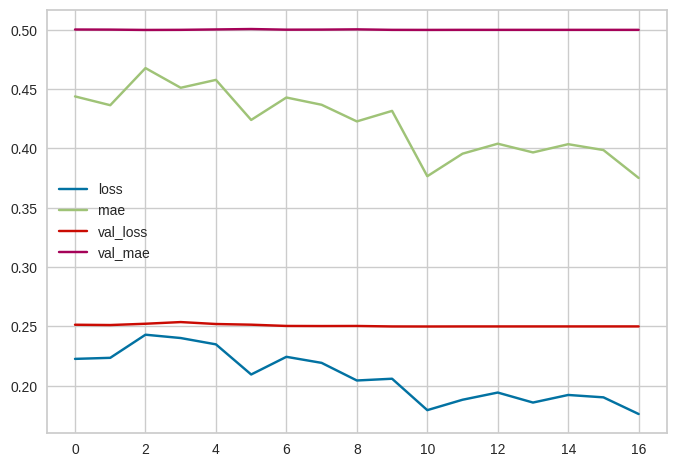

In [84]:
loss_f.plot();